In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from alp.models import ALP
from alp import const, models, exp, beams
from alp import plot_tools as pt
from alp.exp_dicts import EXPERIMENTS

In [7]:
alp = models.ALP(0.1, 1e7)

ncase = 'nlow'
bcase = 'blow'
CHARM_df_ll = exp.Experiment(f"tau_events/df_400GeV_1e6_{ncase}_{bcase}.pkl", exp_dic=EXPERIMENTS['CHARM'], alp=alp, savemem=False)

ncase = 'nhigh'
bcase = 'bhigh'
CHARM_df_hh = exp.Experiment(f"tau_events/df_400GeV_1e6_{ncase}_{bcase}.pkl", exp_dic=EXPERIMENTS['CHARM'], alp=alp, savemem=False)


ncase = 'nhigh'
bcase = 'blow'
CHARM_df_hl = exp.Experiment(f"tau_events/df_400GeV_1e6_{ncase}_{bcase}.pkl", exp_dic=EXPERIMENTS['CHARM'], alp=alp, savemem=False)

ncase = 'nlow'
bcase = 'bhigh'
CHARM_df_lh = exp.Experiment(f"tau_events/df_400GeV_1e6_{ncase}_{bcase}.pkl", exp_dic=EXPERIMENTS['CHARM'], alp=alp, savemem=False)

SPS_files  = 'pythia8_events/sps_400GeV.pkl'
CHARM_pythia = exp.Experiment(SPS_files, exp_dic=EXPERIMENTS['CHARM'], alp=alp, savemem=False)


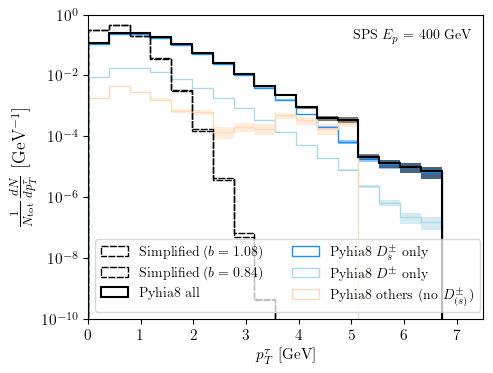

In [9]:
Ebeam=400 # GeV
bins = np.linspace(0, 7.5, 20)

fig, ax = pt.std_fig(figsize=(5, 4))

_=ax.hist(CHARM_df_hh.p4_taus.pt, bins=bins, weights=CHARM_df_hh.tau_weights, histtype='step', label=rf'Simplified ($b = {0.96 + 0.06*2:.2f}$)', density=False, color='black', lw=1, ls=(1,(5,1)))
# _=ax.hist(beams.get_pT(CHARM_df_lh.p4_taus), bins=bins, weights=CHARM_df_lh.tau_weights, histtype='step', label=rf'Simplified ($n = {0.96 - 0.06*2:.2f}$)', density=False, color='black', lw=1, ls=(1,(1,1)))

_=ax.hist(CHARM_df_hl.p4_taus.pt, bins=bins, weights=CHARM_df_hl.tau_weights, histtype='step', label=rf'Simplified ($b = {0.96 - 0.06*2:.2f}$)', density=False, color='black', lw=1, ls=(1,(5,1)))
# _=ax.hist(CHARM_df_ll.p4_taus.pt, bins=bins, weights=CHARM_df_ll.tau_weights, histtype='step', label=rf'Simplified ($n = {0.96 - 0.06*2:.2f}$)', density=False, color='black', lw=1, ls=(1,(1,1)))

pt.plot_hist_with_errors(ax, CHARM_pythia.p4_taus.pt, bins=bins, weights=CHARM_pythia.tau_weights, label=r'Pyhia8 all', color='black', lw=1.5, density=False, zorder=1.5)
mask = abs(CHARM_pythia.df_taus['mother_pid']) == 431
pt.plot_hist_with_errors(ax, CHARM_pythia.p4_taus.pt[mask], bins=bins, weights=CHARM_pythia.tau_weights[mask], label=r'Pyhia8 $D_s^\pm$ only', color='dodgerblue', lw=1, density=False, zorder=1.4)
mask = abs(CHARM_pythia.df_taus['mother_pid']) == 411
pt.plot_hist_with_errors(ax, CHARM_pythia.p4_taus.pt[mask], bins=bins, weights=CHARM_pythia.tau_weights[mask], label=r'Pyhia8 $D^\pm$ only', color='lightblue', lw=1, density=False, zorder=1.4)
mask = (abs(CHARM_pythia.df_taus['mother_pid']) != 431) & (abs(CHARM_pythia.df_taus['mother_pid']) != 411)
pt.plot_hist_with_errors(ax, CHARM_pythia.p4_taus.pt[mask], bins=bins, weights=CHARM_pythia.tau_weights[mask], label='Pyhia8 others (no $D_{(s)}^\pm$)', color='peachpuff', lw=1, density=False, zorder=1.4)

ax.semilogy()
ax.set_ylim(1e-10, 1)
ax.set_xlim(0, bins.max())
ax.annotate(rf'SPS $E_p$ = {Ebeam} GeV', xy=(0.67, 0.95), xycoords='axes fraction', fontsize=10, ha='left', va='top')

ax.set_xlabel(r'$p_T^{\tau}$ [GeV]')
ax.set_ylabel(r'$\frac{1}{N_{\rm tot}} \frac{dN}{dp_T^{\tau}}$ [GeV$^{-1}$]', fontsize=13)
ax.legend(loc='lower left', fontsize=10, frameon=True, framealpha=0.75, ncol=2)
fig.savefig('plots/SPS_parentage_breakup_pT.pdf', bbox_inches='tight', dpi=300)

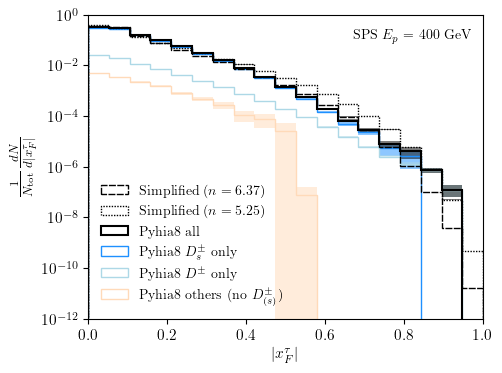

In [40]:
Ebeam=400 # GeV
bins = np.linspace(0, 1, 20)

fig, ax = pt.std_fig(figsize=(5, 4))

# _=ax.hist(abs(beams.get_xF(CHARM_df_hh.p4_taus, Ebeam)), bins=bins, weights=CHARM_df_hh.tau_weights, histtype='step', label=rf'Simplified ($n = {5.81 + 0.28*2:.2f}$)', density=False, color='black', lw=1, ls=(1,(5,1)))
# _=ax.hist(abs(beams.get_xF(CHARM_df_lh.p4_taus, Ebeam)), bins=bins, weights=CHARM_df_lh.tau_weights, histtype='step', label=rf'Simplified ($n = {5.81 - 0.28*2:.2f}$)', density=False, color='black', lw=1, ls=(1,(1,1)))


pt.plot_hist_with_errors(ax, abs(beams.get_xF(CHARM_df_hh.p4_taus, Ebeam)), bins=bins, weights=CHARM_df_hh.tau_weights, label=rf'Simplified ($n = {5.81 + 0.28*2:.2f}$)', color='black', lw=1, ls=(1,(5,1)), density=False, zorder=1.5)
pt.plot_hist_with_errors(ax, abs(beams.get_xF(CHARM_df_lh.p4_taus, Ebeam)), bins=bins, weights=CHARM_df_lh.tau_weights, label=rf'Simplified ($n = {5.81 - 0.28*2:.2f}$)', color='black', lw=1, ls=(1,(1,1)), density=False, zorder=1.5)



pt.plot_hist_with_errors(ax, abs(beams.get_xF(CHARM_pythia.p4_taus, Ebeam)), bins=bins, weights=CHARM_pythia.tau_weights, label=r'Pyhia8 all', color='black', lw=1.5, density=False, zorder=1.5)
mask = abs(CHARM_pythia.df_taus['mother_pid']) == 431
pt.plot_hist_with_errors(ax, abs(beams.get_xF(CHARM_pythia.p4_taus[mask], Ebeam)), bins=bins, weights=CHARM_pythia.tau_weights[mask], label=r'Pyhia8 $D_s^\pm$ only', color='dodgerblue', lw=1, density=False, zorder=1.4)
mask = abs(CHARM_pythia.df_taus['mother_pid']) == 411
pt.plot_hist_with_errors(ax, abs(beams.get_xF(CHARM_pythia.p4_taus[mask], Ebeam)), bins=bins, weights=CHARM_pythia.tau_weights[mask], label=r'Pyhia8 $D^\pm$ only', color='lightblue', lw=1, density=False, zorder=1.4)
mask = (abs(CHARM_pythia.df_taus['mother_pid']) != 431) & (abs(CHARM_pythia.df_taus['mother_pid']) != 411)
pt.plot_hist_with_errors(ax, abs(beams.get_xF(CHARM_pythia.p4_taus[mask], Ebeam)), bins=bins, weights=CHARM_pythia.tau_weights[mask], label='Pyhia8 others (no $D_{(s)}^\pm$)', color='peachpuff', lw=1, density=False, zorder=1.4)

ax.semilogy()
ax.set_ylim(1e-12, 1)
ax.set_xlim(0, 1)
ax.annotate(rf'SPS $E_p$ = {Ebeam} GeV', xy=(0.67, 0.95), xycoords='axes fraction', fontsize=10, ha='left', va='top')

ax.set_xlabel(r'$|x_F^{\tau}|$')
ax.set_ylabel(r'$\frac{1}{N_{\rm tot}} \frac{dN}{d|x_F^{\tau}|}$', fontsize=13)
ax.legend(loc='lower left', fontsize=10, frameon=False)
fig.savefig('plots/SPS_parentage_breakup_xF.pdf', bbox_inches='tight', dpi=300)

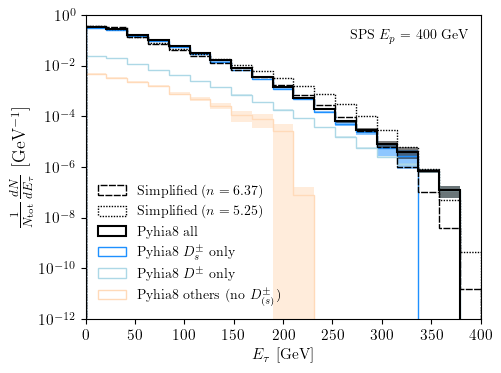

In [12]:
Ebeam=400 # GeV
bins = np.linspace(0, Ebeam, 20)

fig, ax = pt.std_fig(figsize=(5, 4))

_=ax.hist(CHARM_df_hh.p4_taus['E'], bins=bins, weights=CHARM_df_hh.tau_weights, histtype='step', label=rf'Simplified ($n = {5.81 + 0.28*2:.2f}$)', density=False, color='black', lw=1, ls=(1,(5,1)))
_=ax.hist(CHARM_df_lh.p4_taus['E'], bins=bins, weights=CHARM_df_lh.tau_weights, histtype='step', label=rf'Simplified ($n = {5.81 - 0.28*2:.2f}$)', density=False, color='black', lw=1, ls=(1,(1,1)))

pt.plot_hist_with_errors(ax, CHARM_pythia.p4_taus['E'], bins=bins, weights=CHARM_pythia.tau_weights, label=r'Pyhia8 all', color='black', lw=1.5, density=False, zorder=1.5)
mask = abs(CHARM_pythia.df_taus['mother_pid']) == 431
pt.plot_hist_with_errors(ax, CHARM_pythia.p4_taus['E'][mask], bins=bins, weights=CHARM_pythia.tau_weights[mask], label=r'Pyhia8 $D_s^\pm$ only', color='dodgerblue', lw=1, density=False, zorder=1.4)
mask = abs(CHARM_pythia.df_taus['mother_pid']) == 411
pt.plot_hist_with_errors(ax, CHARM_pythia.p4_taus['E'][mask], bins=bins, weights=CHARM_pythia.tau_weights[mask], label=r'Pyhia8 $D^\pm$ only', color='lightblue', lw=1, density=False, zorder=1.4)
mask = (abs(CHARM_pythia.df_taus['mother_pid']) != 431) & (abs(CHARM_pythia.df_taus['mother_pid']) != 411)
pt.plot_hist_with_errors(ax, CHARM_pythia.p4_taus['E'][mask], bins=bins, weights=CHARM_pythia.tau_weights[mask], label='Pyhia8 others (no $D_{(s)}^\pm$)', color='peachpuff', lw=1, density=False, zorder=1.4)

ax.semilogy()
ax.set_ylim(1e-12, 1)
ax.set_xlim(0, Ebeam)

ax.annotate(rf'SPS $E_p$ = {Ebeam} GeV', xy=(0.67, 0.95), xycoords='axes fraction', fontsize=10, ha='left', va='top')

ax.set_xlabel(r'$E_\tau$ [GeV]')
ax.set_ylabel(r'$\frac{1}{N_{\rm tot}} \frac{dN}{d E_{\tau}}$ [GeV$^{-1}$]', fontsize=13)
ax.legend(loc='lower left', fontsize=10, frameon=False)
fig.savefig('plots/SPS_parentage_breakup_Etau.pdf', bbox_inches='tight', dpi=300)

In [15]:
alp = models.ALP(0.1, 1e7)

ncase = 'nlow'
bcase = 'blow'
NOVA_df_ll = exp.Experiment(f"tau_events/df_120GeV_1e6_{ncase}_{bcase}.pkl", exp_dic=EXPERIMENTS['NoVA'], alp=alp, savemem=False)

ncase = 'nhigh'
bcase = 'bhigh'
NOVA_df_hh = exp.Experiment(f"tau_events/df_120GeV_1e6_{ncase}_{bcase}.pkl", exp_dic=EXPERIMENTS['NoVA'], alp=alp, savemem=False)


ncase = 'nhigh'
bcase = 'blow'
NOVA_df_hl = exp.Experiment(f"tau_events/df_120GeV_1e6_{ncase}_{bcase}.pkl", exp_dic=EXPERIMENTS['NoVA'], alp=alp, savemem=False)

ncase = 'nlow'
bcase = 'bhigh'
NOVA_df_lh = exp.Experiment(f"tau_events/df_120GeV_1e6_{ncase}_{bcase}.pkl", exp_dic=EXPERIMENTS['NoVA'], alp=alp, savemem=False)

NuMI_files  = 'pythia8_events/numi_120GeV.pkl'
NOVA_pythia = exp.Experiment(NuMI_files, exp_dic=EXPERIMENTS['NoVA'], alp=alp, savemem=False)


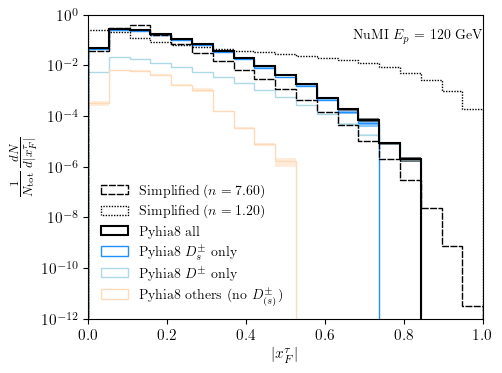

In [16]:
Ebeam=120 # GeV
bins = np.linspace(0, 1, 20)

fig, ax = pt.std_fig(figsize=(5, 4))

_=ax.hist(abs(beams.get_xF(NOVA_df_hh.p4_taus, Ebeam)), bins=bins, weights=NOVA_df_hh.tau_weights, histtype='step', label=rf'Simplified ($n = {4.4+1.6*2:.2f}$)', density=False, color='black', lw=1, ls=(1,(5,1)))
_=ax.hist(abs(beams.get_xF(NOVA_df_lh.p4_taus, Ebeam)), bins=bins, weights=NOVA_df_lh.tau_weights, histtype='step', label=rf'Simplified ($n = {4.4-1.6*2:.2f}$)', density=False, color='black', lw=1, ls=(1,(1,1)))

pt.plot_hist_with_errors(ax, abs(beams.get_xF(NOVA_pythia.p4_taus, Ebeam)), bins=bins, weights=NOVA_pythia.tau_weights, label=r'Pyhia8 all', color='black', lw=1.5, density=False, zorder=1.5)
mask = abs(NOVA_pythia.df_taus['mother_pid']) == 431
pt.plot_hist_with_errors(ax, abs(beams.get_xF(NOVA_pythia.p4_taus[mask], Ebeam)), bins=bins, weights=NOVA_pythia.tau_weights[mask], label=r'Pyhia8 $D_s^\pm$ only', color='dodgerblue', lw=1, density=False, zorder=1.4)
mask = abs(NOVA_pythia.df_taus['mother_pid']) == 411
pt.plot_hist_with_errors(ax, abs(beams.get_xF(NOVA_pythia.p4_taus[mask], Ebeam)), bins=bins, weights=NOVA_pythia.tau_weights[mask], label=r'Pyhia8 $D^\pm$ only', color='lightblue', lw=1, density=False, zorder=1.4)
mask = (abs(NOVA_pythia.df_taus['mother_pid']) != 431) & (abs(NOVA_pythia.df_taus['mother_pid']) != 411)
pt.plot_hist_with_errors(ax, abs(beams.get_xF(NOVA_pythia.p4_taus[mask], Ebeam)), bins=bins, weights=NOVA_pythia.tau_weights[mask], label='Pyhia8 others (no $D_{(s)}^\pm$)', color='peachpuff', lw=1, density=False, zorder=1.4)

ax.semilogy()
ax.set_ylim(1e-12, 1)
ax.set_xlim(0, 1)

ax.annotate(rf'NuMI $E_p$ = {Ebeam} GeV', xy=(0.67, 0.95), xycoords='axes fraction', fontsize=10, ha='left', va='top')

ax.set_xlabel(r'$|x_F^{\tau}|$')
ax.set_ylabel(r'$\frac{1}{N_{\rm tot}} \frac{dN}{d|x_F^{\tau}|}$', fontsize=13)
ax.legend(loc='lower left', fontsize=10, frameon=False)
fig.savefig('plots/NuMI_parentage_breakup_xF.pdf', bbox_inches='tight', dpi=300)

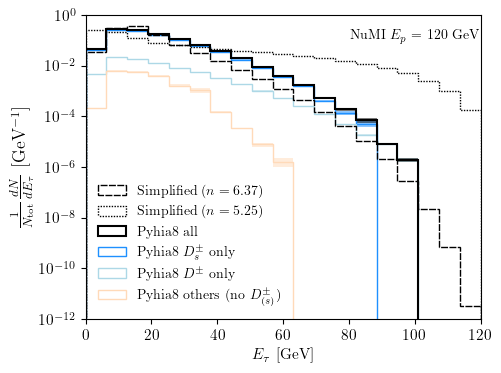

In [18]:
Ebeam=120 # GeV
bins = np.linspace(0, Ebeam, 20)

fig, ax = pt.std_fig(figsize=(5, 4))

_=ax.hist(NOVA_df_hh.p4_taus['E'], bins=bins, weights=NOVA_df_hh.tau_weights, histtype='step', label=rf'Simplified ($n = {5.81 + 0.28*2:.2f}$)', density=False, color='black', lw=1, ls=(1,(5,1)))
_=ax.hist(NOVA_df_lh.p4_taus['E'], bins=bins, weights=NOVA_df_lh.tau_weights, histtype='step', label=rf'Simplified ($n = {5.81 - 0.28*2:.2f}$)', density=False, color='black', lw=1, ls=(1,(1,1)))

pt.plot_hist_with_errors(ax, NOVA_pythia.p4_taus['E'], bins=bins, weights=NOVA_pythia.tau_weights, label=r'Pyhia8 all', color='black', lw=1.5, density=False, zorder=1.5)
mask = abs(NOVA_pythia.df_taus['mother_pid']) == 431
pt.plot_hist_with_errors(ax, NOVA_pythia.p4_taus['E'][mask], bins=bins, weights=NOVA_pythia.tau_weights[mask], label=r'Pyhia8 $D_s^\pm$ only', color='dodgerblue', lw=1, density=False, zorder=1.4)
mask = abs(NOVA_pythia.df_taus['mother_pid']) == 411
pt.plot_hist_with_errors(ax, NOVA_pythia.p4_taus['E'][mask], bins=bins, weights=NOVA_pythia.tau_weights[mask], label=r'Pyhia8 $D^\pm$ only', color='lightblue', lw=1, density=False, zorder=1.4)
mask = (abs(NOVA_pythia.df_taus['mother_pid']) != 431) & (abs(NOVA_pythia.df_taus['mother_pid']) != 411)
pt.plot_hist_with_errors(ax, NOVA_pythia.p4_taus['E'][mask], bins=bins, weights=NOVA_pythia.tau_weights[mask], label='Pyhia8 others (no $D_{(s)}^\pm$)', color='peachpuff', lw=1, density=False, zorder=1.4)

ax.semilogy()
ax.set_ylim(1e-12, 1)
ax.set_xlim(0, Ebeam)

ax.annotate(rf'NuMI $E_p$ = {Ebeam} GeV', xy=(0.67, 0.95), xycoords='axes fraction', fontsize=10, ha='left', va='top')

ax.set_xlabel(r'$E_\tau$ [GeV]')
ax.set_ylabel(r'$\frac{1}{N_{\rm tot}} \frac{dN}{d E_{\tau}}$ [GeV$^{-1}$]', fontsize=13)
ax.legend(loc='lower left', fontsize=10, frameon=False)
fig.savefig('plots/NuMI_parentage_breakup_Etau.pdf', bbox_inches='tight', dpi=300)

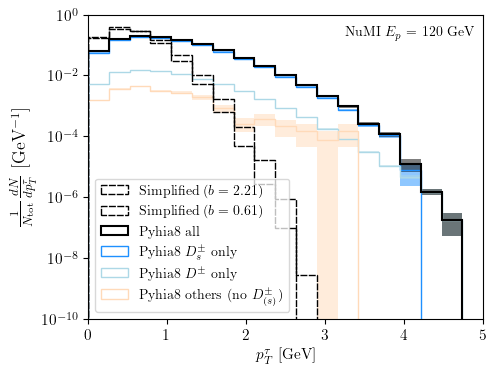

In [43]:
Ebeam=120 # GeV
bins = np.linspace(0, 5, 20)

fig, ax = pt.std_fig(figsize=(5, 4))

_=ax.hist(NOVA_df_hh.p4_taus.pt, bins=bins, weights=NOVA_df_hh.tau_weights, histtype='step', label=rf'Simplified ($b = {1.41 + 0.4*2:.2f}$)', density=False, color='black', lw=1, ls=(1,(5,1)))
# _=ax.hist(beams.get_pT(CHARM_df_lh.p4_taus), bins=bins, weights=CHARM_df_lh.tau_weights, histtype='step', label=rf'Simplified ($n = {1.41 - 0.4*2:.2f}$)', density=False, color='black', lw=1, ls=(1,(1,1)))

_=ax.hist(NOVA_df_hl.p4_taus.pt, bins=bins, weights=NOVA_df_hl.tau_weights, histtype='step', label=rf'Simplified ($b = {1.41 - 0.4*2:.2f}$)', density=False, color='black', lw=1, ls=(1,(5,1)))
# _=ax.hist(beams.get_pT(CHARM_df_ll.p4_taus), bins=bins, weights=CHARM_df_ll.tau_weights, histtype='step', label=rf'Simplified ($n = {1.41 - 0.4*2:.2f}$)', density=False, color='black', lw=1, ls=(1,(1,1)))

pt.plot_hist_with_errors(ax, NOVA_pythia.p4_taus.pt, bins=bins, weights=NOVA_pythia.tau_weights, label=r'Pyhia8 all', color='black', lw=1.5, density=False, zorder=1.5)
mask = abs(NOVA_pythia.df_taus['mother_pid']) == 431
pt.plot_hist_with_errors(ax, NOVA_pythia.p4_taus.pt[mask], bins=bins, weights=NOVA_pythia.tau_weights[mask], label=r'Pyhia8 $D_s^\pm$ only', color='dodgerblue', lw=1, density=False, zorder=1.4)
mask = abs(NOVA_pythia.df_taus['mother_pid']) == 411
pt.plot_hist_with_errors(ax, NOVA_pythia.p4_taus.pt[mask], bins=bins, weights=NOVA_pythia.tau_weights[mask], label=r'Pyhia8 $D^\pm$ only', color='lightblue', lw=1, density=False, zorder=1.4)
mask = (abs(NOVA_pythia.df_taus['mother_pid']) != 431) & (abs(NOVA_pythia.df_taus['mother_pid']) != 411)
pt.plot_hist_with_errors(ax, NOVA_pythia.p4_taus.pt[mask], bins=bins, weights=NOVA_pythia.tau_weights[mask], label='Pyhia8 others (no $D_{(s)}^\pm$)', color='peachpuff', lw=1, density=False, zorder=1.4)

ax.semilogy()
ax.set_ylim(1e-10, 1)
ax.set_xlim(0, bins.max())
ax.annotate(rf'NuMI $E_p$ = {Ebeam} GeV', xy=(0.65, 0.96), xycoords='axes fraction', fontsize=10, ha='left', va='top')

ax.set_xlabel(r'$p_T^{\tau}$ [GeV]')
ax.set_ylabel(r'$\frac{1}{N_{\rm tot}} \frac{dN}{dp_T^\tau}$ [GeV$^{-1}$]', fontsize=13)
ax.legend(loc='lower left', fontsize=10, frameon=True, framealpha=0.75, ncol=1)
fig.savefig('plots/NuMI_parentage_breakup_pT.pdf', bbox_inches='tight', dpi=300)

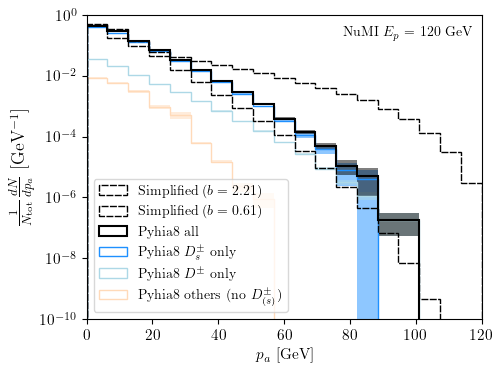

In [48]:
Ebeam=120 # GeV
bins = np.linspace(0, Ebeam, 20)

fig, ax = pt.std_fig(figsize=(5, 4))

_=ax.hist(NOVA_df_ll.p4_alp.p, bins=bins, weights=NOVA_df_ll.tau_weights, histtype='step', label=rf'Simplified ($b = {1.41 + 0.4*2:.2f}$)', density=False, color='black', lw=1, ls=(1,(5,1)))
# _=ax.hist(beams.get_pT(CHARM_df_lh.p4_taus), bins=bins, weights=CHARM_df_lh.tau_weights, histtype='step', label=rf'Simplified ($n = {1.41 - 0.4*2:.2f}$)', density=False, color='black', lw=1, ls=(1,(1,1)))

_=ax.hist(NOVA_df_hl.p4_alp.p, bins=bins, weights=NOVA_df_hl.tau_weights, histtype='step', label=rf'Simplified ($b = {1.41 - 0.4*2:.2f}$)', density=False, color='black', lw=1, ls=(1,(5,1)))
# _=ax.hist(beams.get_pT(CHARM_df_ll.p4_taus), bins=bins, weights=CHARM_df_ll.tau_weights, histtype='step', label=rf'Simplified ($n = {1.41 - 0.4*2:.2f}$)', density=False, color='black', lw=1, ls=(1,(1,1)))

pt.plot_hist_with_errors(ax, NOVA_pythia.p4_alp.p, bins=bins, weights=NOVA_pythia.tau_weights, label=r'Pyhia8 all', color='black', lw=1.5, density=False, zorder=1.5)
mask = abs(NOVA_pythia.df_taus['mother_pid']) == 431
pt.plot_hist_with_errors(ax, NOVA_pythia.p4_alp.p[mask], bins=bins, weights=NOVA_pythia.tau_weights[mask], label=r'Pyhia8 $D_s^\pm$ only', color='dodgerblue', lw=1, density=False, zorder=1.4)
mask = abs(NOVA_pythia.df_taus['mother_pid']) == 411
pt.plot_hist_with_errors(ax, NOVA_pythia.p4_alp.p[mask], bins=bins, weights=NOVA_pythia.tau_weights[mask], label=r'Pyhia8 $D^\pm$ only', color='lightblue', lw=1, density=False, zorder=1.4)
mask = (abs(NOVA_pythia.df_taus['mother_pid']) != 431) & (abs(NOVA_pythia.df_taus['mother_pid']) != 411)
pt.plot_hist_with_errors(ax, NOVA_pythia.p4_alp.p[mask], bins=bins, weights=NOVA_pythia.tau_weights[mask], label='Pyhia8 others (no $D_{(s)}^\pm$)', color='peachpuff', lw=1, density=False, zorder=1.4)

ax.semilogy()
ax.set_ylim(1e-10, 1)
ax.set_xlim(0, bins.max())
ax.annotate(rf'NuMI $E_p$ = {Ebeam} GeV', xy=(0.65, 0.96), xycoords='axes fraction', fontsize=10, ha='left', va='top')

ax.set_xlabel(r'$p_a$ [GeV]')
ax.set_ylabel(r'$\frac{1}{N_{\rm tot}} \frac{dN}{dp_a}$ [GeV$^{-1}$]', fontsize=13)
ax.legend(loc='lower left', fontsize=10, frameon=True, framealpha=0.75, ncol=1)
fig.savefig('plots/NuMI_parentage_breakup_alp_p.pdf', bbox_inches='tight', dpi=300)

In [86]:
nsigma = 2

BR_D_to_tau = 0.056 # Ds -> tau branching ratio
frag_frac = 0.08 # Fragmentation fraction
xsec_tot = 38 # mbar -- total pp x section

# NuMI
xsec_ccbar_low = (4.6-nsigma*1.8)*1e-3 # mbar -- ccbar prod x section
xsec_ccbar_central = 4.6e-3 # mbar -- ccbar prod x section
xsec_ccbar_high = (4.6+nsigma*1.8)*1e-3 # mbar -- ccbar prod x section


low_normalization = {}
central_normalization = {}
high_normalization = {}

low_normalization['NuMI'] = BR_D_to_tau * frag_frac * xsec_ccbar_low / xsec_tot
central_normalization['NuMI'] = BR_D_to_tau * frag_frac * xsec_ccbar_central / xsec_tot
high_normalization['NuMI'] = BR_D_to_tau * frag_frac * xsec_ccbar_high / xsec_tot

# SPS
xsec_ccbar_low = (20.0 - nsigma*4.5)*1e-3 # mbar -- ccbar prod x section
xsec_ccbar_central = 20.0e-3 # mbar -- ccbar prod x section
xsec_ccbar_high = (20.0 + nsigma*4.5)*1e-3 # mbar -- ccbar prod x section

low_normalization['SPS'] = BR_D_to_tau * frag_frac * xsec_ccbar_low / xsec_tot
central_normalization['SPS'] = BR_D_to_tau * frag_frac * xsec_ccbar_central / xsec_tot
high_normalization['SPS'] = BR_D_to_tau * frag_frac * xsec_ccbar_high / xsec_tot

In [87]:
from alp import exp_dicts
pythia_central = {}
pythia_central['SPS'] = exp_dicts.SPS_tau_per_POT
pythia_central['NuMI'] = exp_dicts.NuMI_tau_per_POT

In [88]:
for exp in ['SPS', 'NuMI']:
    print(f"Tau/POT: {pythia_central[exp]:.3g} vs {central_normalization[exp]:.3g} +/- {(high_normalization[exp]- central_normalization[exp])*2:.3g})")

Tau/POT: 1.7e-06 vs 2.36e-06 +/- 2.12e-06)
Tau/POT: 2.9e-07 vs 5.42e-07 +/- 8.49e-07)


data/NOVA_nlow_blow_rates_anarchy_vMC.npy, 0.0, 27239900026247.598
data/NOVA_nlow_bhigh_rates_anarchy_vMC.npy, 0.0, 28090586939483.816
data/NOVA_nhigh_blow_rates_anarchy_vMC.npy, 0.0, 11940799974026.35
data/NOVA_nhigh_bhigh_rates_anarchy_vMC.npy, 0.0, 11032574747241.975
data/SHiP_nlow_blow_rates_anarchy_vMC.npy, 0.0, 1.1124828945569987e+18
data/SHiP_nlow_bhigh_rates_anarchy_vMC.npy, 0.0, 1.1213494725329068e+18
data/SHiP_nhigh_blow_rates_anarchy_vMC.npy, 0.0, 6.006018368695228e+17
data/SHiP_nhigh_bhigh_rates_anarchy_vMC.npy, 0.0, 6.108758120816184e+17
data/CHARM_nlow_blow_rates_anarchy_vMC.npy, 0.0, 6327395857186.868
data/CHARM_nlow_bhigh_rates_anarchy_vMC.npy, 0.0, 6519716377252.23
data/CHARM_nhigh_blow_rates_anarchy_vMC.npy, 0.0, 2334270376199.7715
data/CHARM_nhigh_bhigh_rates_anarchy_vMC.npy, 0.0, 2500069832571.36
data/BEBC_nlow_blow_rates_anarchy_vMC.npy, 0.0, 806805662185.0476
data/BEBC_nlow_bhigh_rates_anarchy_vMC.npy, 0.0, 840438540109.3523
data/BEBC_nhigh_blow_rates_anarchy_vMC.

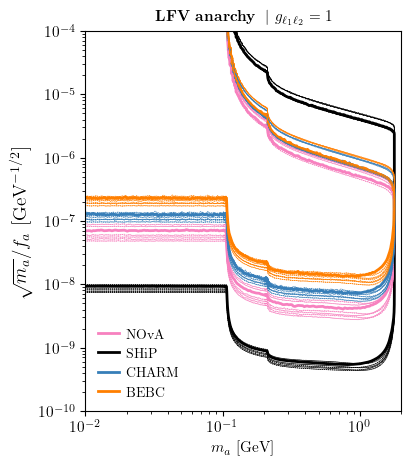

In [ ]:
from alp.plot_tools import *

fig, ax = std_fig(figsize=(4, 5))
lamb = 1
c_lepton = np.array([[1, lamb, lamb], 
                     [lamb, 1, lamb],
                     [lamb, lamb, 1]
                     ])

# labels for legend
labels = []
labelnames = []
fa_power=1
ma_power=0.5

Nsig = 2.3
y_funcs = []
for exp_name, color, beam_name in [('NOVA', CB_color_cycle_2[3],'NuMI'), ('SHiP', 'black','SPS'), ('CHARM', CB_color_cycle_2[0],'SPS'), ('BEBC', CB_color_cycle_2[1],'SPS')]:
    for ncase in ['nlow', 'nhigh']:
        for bcase in ['blow', 'bhigh']:
            label = f'{ncase} {bcase}'

            X, Y, Z = np.load(f"data/{exp_name}_{ncase}_{bcase}_rates_anarchy_vMC.npy", allow_pickle=True)

            # Adjust normalization:
            Z_central =  Z * central_normalization[beam_name] / pythia_central[beam_name]
            Z_high =  Z * high_normalization[beam_name] / pythia_central[beam_name]
            Z_low =  Z * low_normalization[beam_name] / pythia_central[beam_name]

            print(f"data/{exp_name}_{ncase}_{bcase}_rates_anarchy_vMC.npy, {Z.min()}, {Z.max()}")
        
            c = ax.contour(X, Y**fa_power, Z_central, levels=[Nsig], colors='None')
            x_central, y_central = c.get_paths()[0].vertices.T
            # label=rf'{exp_name} {label}', 
            plt.plot(x_central, y_central*x_central**ma_power, lw=0.5, color=color, zorder=2, ls=(1,(2,1)))

            X, Y, Z = np.load(f"data/{exp_name}_{ncase}_{bcase}_rates_anarchy_vMC.npy", allow_pickle=True)

            c = ax.contour(X, Y**fa_power, Z_low, levels=[Nsig], colors='None')
            x_central, y_low = c.get_paths()[0].vertices.T
            plt.plot(x_central, y_low*x_central**ma_power, lw=0.5, color=color, zorder=2, ls=(1,(2,1)))

            c = ax.contour(X, Y**fa_power, Z_high, levels=[Nsig], colors='None')
            x_central, y_high = c.get_paths()[0].vertices.T
            # plt.fill_between(x_central, y_low*x_central**ma_power, y_high*x_central**ma_power, lw=0.25, color=color, zorder=1, alpha=0.5)
            plt.plot(x_central, y_high*x_central**ma_power, lw=0.5, color=color, zorder=2, ls=(1,(2,1)))
            # label=rf'{exp_name} {label}', 
            # plt.fill_between(x_central, y_low*x_central**ma_power, y_high*x_central**ma_power, lw=0.25, color=color, zorder=1, alpha=0.5)



    # try:
    X, Y, Z = np.load(f"data/{exp_name}_pythia8_rates_anarchy_vMC.npy", allow_pickle=True)
    # except FileNotFoundError:
        # X, Y, Z = np.load(f"data/{exp_name}_rates_anarchy_jul17.npy", allow_pickle=True)

    c = ax.contour(X, Y**fa_power, Z, levels=[Nsig], colors='None')
    x_pythia, y_pythia = c.get_paths()[0].vertices.T

    plt.plot(x_pythia, y_pythia*x_pythia**ma_power, color=color, label=rf'{exp_name}'.replace("NOVA","NOvA"), zorder=1, alpha=1, lw=2)

ax.set_yscale('log')
ax.set_xscale('log')
if ma_power == 0.5:
    ax.set_ylabel(rf"$\sqrt{{m_a}} / f_a$ [GeV$^{{-1/2}}$]", fontsize=14)
else:
    ax.set_ylabel(rf"$m_a^{{{ma_power}}} / f_a^{{{fa_power}}}$ [GeV$^{{{-fa_power+ma_power}}}$]", fontsize=14)
ax.set_xlabel(r"$m_a$ [GeV]")

title = r"{\bf LFV anarchy} $\,\,\vert\,\,$"
# ax.annotate(r'\noindent \bf LFV anarchy', xy=(0.02, 0.98), xycoords='axes fraction', fontsize=11, ha='left', va='top')
title += rf"$g_{{\ell_1 \ell_2}} = {int(c_lepton[0,0])}$"
ax.set_title(title, fontsize=11, pad=7.5)
# 
ax.legend(loc='lower left', fontsize=10, frameon=False, ncol=1, handlelength=1.5, handletextpad=0.5)

ax.set_ylim((1e-10)**fa_power, (1e-4)**fa_power)
ax.set_xlim(1e-2,2)
fig.savefig('plots/ALP_anarchy_uncertainty.pdf', bbox_inches='tight', dpi=300)